In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import pyfits
from collections import OrderedDict
from astropy.coordinates import SkyCoord
import healpy as hp
from astropy import units as u

/lustre/hpc/icecube/mrameez/.local/lib/python3.5/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [3]:
def plot_oneset(ax, RA,Dec,org=0,title='Mollweide projection', projection='mollweide', color='red', size=2.0, marker='o', fillstyle='full', line=False, alpha=0.8):
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    if not line:
        ax.scatter(np.radians(x),np.radians(Dec), alpha=alpha, s=size, color=color, marker=marker)
    else:
        ax.plot(np.radians(x),np.radians(Dec), alpha=0.8, color=color, lw=2, ls='--')

def EquatorialtoGalactic(ra, dec):
    skc = SkyCoord(ra = ra*u.degree, dec =dec*u.degree)
    return skc.galactic.l.value, skc.galactic.b.value

In [4]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("M1")

In [5]:
#Names of SN1a from Perlmutter et al 1999
names = '1992bi . 1994F . 1994G . 1994H . 1994al . 1994am . 1994an ...... 1995aq ...... 1995ar . ...... 1995as . ...... 1995at . ...... 1995aw ...... 1995ax ...... 1995ay ...... 1995az . ...... 1995ba ...... 1996cf . ...... 1996cg . ...... 1996ci . ...... 1996ck ...... 1996cl . ...... 1996cm ...... 1996cn ...... 1997F . 1997G . 1997H . 1997I . . 1997J . . 1997K . 1997L . 1997N . 1997O . 1997P . 1997Q . 1997R . 1997S . . 1997ac . 1997af . 1997ai . 1997aj . 1997am .1997ap. 1990O . ..... 1990af . ..... 1992P . . ..... 1992ae . ..... 1992ag . ..... 1992al . ..... 1992aq . ..... 1992bc . ..... 1992bg . ..... 1992bh . ..... 1992bl . ..... 1992bo . ..... 1992bp . ..... 1992br . ..... 1992bs . ..... 1993B . . ..... 1993O . ..... 1993ag . ..... '
names = names.split('.')
redshifts = '0.458 0.001 0.354 0.001 0.425 0.001 0.374 0.001 0.420 0.001 0.372 0.001 0.378 0.001 0.453 0.001 0.465 0.005 0.498 0.001 0.655 0.001 0.400 0.030 0.615 0.001 0.480 0.001 0.450 0.001 0.388 0.001 0.570 0.010 0.490 0.010 0.495 0.001 0.656 0.001 0.828 0.001 0.450 0.010 0.430 0.010 0.580 0.001 0.763 0.001 0.526 0.001 0.172 0.001 0.619 0.001 0.592 0.001 0.550 0.010 0.180 0.001 0.374 0.001 0.472 0.001 0.430 0.010 0.657 0.001 0.612 0.001 0.320 0.010 0.579 0.001 0.450 0.010 0.581 0.001 0.416 0.001 0.830 0.010 0.030 0.002 0.050 0.002 0.026 0.002 0.075 0.002 0.026 0.002 0.014 0.002 0.101 0.002 0.020 0.002 0.036 0.002 0.045 0.002 0.043 0.002 0.018 0.002 0.079 0.002 0.088 0.002 0.063 0.002 0.071 0.002 0.052 0.002 0.050 0.002'.split(' ')
sannames = []
for i in names:
    if len(i)>2:
        sannames.append(i)
names=sannames
sannames=[]
for i in names:
    sannames.append(i.replace(' ', ''))
redshifts=np.asarray(redshifts)

In [6]:
print(sannames, len(sannames), len(redshifts))

['1992bi', '1994F', '1994G', '1994H', '1994al', '1994am', '1994an', '1995aq', '1995ar', '1995as', '1995at', '1995aw', '1995ax', '1995ay', '1995az', '1995ba', '1996cf', '1996cg', '1996ci', '1996ck', '1996cl', '1996cm', '1996cn', '1997F', '1997G', '1997H', '1997I', '1997J', '1997K', '1997L', '1997N', '1997O', '1997P', '1997Q', '1997R', '1997S', '1997ac', '1997af', '1997ai', '1997aj', '1997am', '1997ap', '1990O', '1990af', '1992P', '1992ae', '1992ag', '1992al', '1992aq', '1992bc', '1992bg', '1992bh', '1992bl', '1992bo', '1992bp', '1992br', '1992bs', '1993B', '1993O', '1993ag'] 60 120


In [7]:
print(len(redshifts[0::2]))

60


In [8]:
ras = []
decs = []
res={}
for n in sannames:
    #print(n)
    res[n] = Simbad.query_object('SN'+n)
    print(res[n])
    ras.append(res[n]['RA'].data[0])
    decs.append(res[n]['DEC'].data[0])

ras, decs = np.asarray(ras), np.asarray(decs)

 MAIN_ID       RA         DEC     ... COO_WAVELENGTH     COO_BIBCODE    
            "h:m:s"     "d:m:s"   ...                                   
--------- ----------- ----------- ... -------------- -------------------
SN 1992bi 16 10 12.79 +39 47 12.5 ...                1992IAUC.5652....1P
MAIN_ID       RA         DEC     ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
           "h:m:s"     "d:m:s"   ...                                            
-------- ----------- ----------- ... -------- -------------- -------------------
SN 1994F 11 49 59.53 +10 42 57.8 ...        D                2008yCat.2283....0B
MAIN_ID       RA         DEC     ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
           "h:m:s"     "d:m:s"   ...                                            
-------- ----------- ----------- ... -------- -------------- -------------------
SN 1994G 10 19 26.68 +50 52 19.4 ...        D                2008yCat.2283....0B
MAIN_ID       RA         DEC     ... COO_QUAL COO_WAVELENGTH

MAIN_ID       RA         DEC     ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
           "h:m:s"     "d:m:s"   ...                                            
-------- ----------- ----------- ... -------- -------------- -------------------
SN 1997P 10 55 55.93 -03 56 48.2 ...        D                1997IAUC.6540Q...1S
MAIN_ID       RA         DEC     ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
           "h:m:s"     "d:m:s"   ...                                            
-------- ----------- ----------- ... -------- -------------- -------------------
SN 1997Q 10 56 51.48 -03 58 36.9 ...        D                1997IAUC.6540Q...1S
MAIN_ID       RA         DEC     ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
           "h:m:s"     "d:m:s"   ...                                            
-------- ----------- ----------- ... -------- -------------- -------------------
SN 1997R 10 57 19.23 -03 54 51.7 ...        D                1997IAUC.6540Q...1S
MAIN_ID       RA         DEC

In [13]:
print(redshifts)
zs = np.asarray([float(k) for k in redshifts[0::2]])

['0.458' '0.001' '0.354' '0.001' '0.425' '0.001' '0.374' '0.001' '0.420'
 '0.001' '0.372' '0.001' '0.378' '0.001' '0.453' '0.001' '0.465' '0.005'
 '0.498' '0.001' '0.655' '0.001' '0.400' '0.030' '0.615' '0.001' '0.480'
 '0.001' '0.450' '0.001' '0.388' '0.001' '0.570' '0.010' '0.490' '0.010'
 '0.495' '0.001' '0.656' '0.001' '0.828' '0.001' '0.450' '0.010' '0.430'
 '0.010' '0.580' '0.001' '0.763' '0.001' '0.526' '0.001' '0.172' '0.001'
 '0.619' '0.001' '0.592' '0.001' '0.550' '0.010' '0.180' '0.001' '0.374'
 '0.001' '0.472' '0.001' '0.430' '0.010' '0.657' '0.001' '0.612' '0.001'
 '0.320' '0.010' '0.579' '0.001' '0.450' '0.010' '0.581' '0.001' '0.416'
 '0.001' '0.830' '0.010' '0.030' '0.002' '0.050' '0.002' '0.026' '0.002'
 '0.075' '0.002' '0.026' '0.002' '0.014' '0.002' '0.101' '0.002' '0.020'
 '0.002' '0.036' '0.002' '0.045' '0.002' '0.043' '0.002' '0.018' '0.002'
 '0.079' '0.002' '0.088' '0.002' '0.063' '0.002' '0.071' '0.002' '0.052'
 '0.002' '0.050' '0.002']


In [14]:
skc = SkyCoord(ra = ras, dec=decs, unit=(u.hourangle, u.deg))
l, b = skc.galactic.l.value, skc.galactic.b.value

In [15]:
l, b

(array([ 63.26401552, 258.61182491, 162.89266176, 173.05704154,
        163.15720538, 173.10376103,  69.40832963, 113.34027901,
        127.65651577, 127.75610709, 129.27322971, 165.47123948,
        166.05578396, 176.86957561, 202.11430784, 215.98719219,
        250.44896683, 220.76645675, 333.10911544, 301.40871355,
        256.57354024,  10.89055652, 334.31349907, 204.47153842,
        202.33087955, 202.37352515, 202.36622597, 209.92080581,
        216.35334229, 220.02621812, 220.65536799, 220.06550481,
        256.58228263, 256.87717152, 256.94996519, 256.95926258,
        220.01006159, 220.02607816, 249.95731398, 256.60431365,
        256.33995482, 333.64540375,  37.65365941, 330.8226826 ,
        295.61565239, 332.70504417, 312.48792327, 347.33692086,
          1.77585153, 245.69381096, 274.61148956, 267.84947548,
        344.12878488, 261.99620268, 208.83190212, 288.01398165,
        240.0281461 , 273.32346677, 312.41328577, 268.43499131]),
 array([ 47.23891458,  68.12709911,  5

In [16]:
CMBdipra = 168.0
CMBdipdec = -7.0
SMAC2ra = 147.3 # 200h^-1 bulk flow, 372+/-127 From https://academic.oup.com/mnras/article/352/1/61/999349
SMAC2dec = -46.0
TwoMppra = 194.802
TwoMppdec = -56.855

CMBdipl, CMBdipb = EquatorialtoGalactic(CMBdipra, CMBdipdec)
SMAC2l, SMAC2b = EquatorialtoGalactic(SMAC2ra, SMAC2dec)
TwoMppl, TwoMppb = EquatorialtoGalactic(TwoMppra, TwoMppdec)
SpeedOfLight = 299792.458

In [17]:
print(CMBdipl, CMBdipb)

264.1396788332308 48.23934755645049


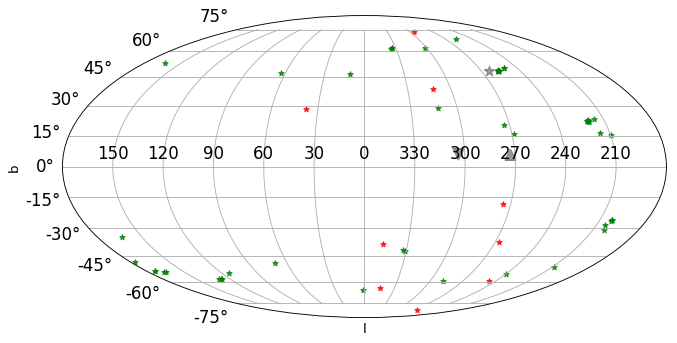

In [18]:
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
org = 0
tick_labels = np.remainder(tick_labels+360+org,360)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')



plot_oneset(ax, l[zs<0.05], b[zs<0.05],  color='red', marker='*', size=25, fillstyle='none')
plot_oneset(ax, l[zs>=0.05], b[zs>=0.05],  color='green', marker='*', size=25, fillstyle='none')
plot_oneset(ax, np.asarray([CMBdipl]), np.asarray([CMBdipb]), color='gray', marker='*', size=100, fillstyle='none')
plot_oneset(ax, np.asarray([SMAC2l]), np.asarray([SMAC2b]), color='gray', marker='^', size=100, fillstyle='none')
plot_oneset(ax, np.asarray([TwoMppl]), np.asarray([TwoMppb]), color='gray', marker='v', size=100, fillstyle='none')
ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
#ax.set_title(title)
#ax.title.set_fontsize(15)
ax.set_xlabel("l")
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel("b")
ax.yaxis.label.set_fontsize(12)
ax.grid(True, which='both')
ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
#ax.set_title(title)
#ax.title.set_fontsize(15)
ax.set_xlabel("l")
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel("b")
ax.yaxis.label.set_fontsize(12)
ax.grid(True, which='both')

In [19]:
def dAngleDeg(ra1, dec1, ra2, dec2):
    return np.rad2deg(np.arccos(np.cos(np.deg2rad(dec1))*np.cos(np.deg2rad(dec2))*np.cos(np.deg2rad(ra1) - np.deg2rad(ra2))+np.sin(np.deg2rad(dec1))*np.sin(np.deg2rad(dec2))))

In [20]:
angs = dAngleDeg(SMAC2l, SMAC2b, l, b)

In [21]:
bins=np.logspace(-2., 0., 21)
print(b)

[ 47.23891458  68.12709911  52.77874247 -53.51736802 -34.81630096
 -53.56310405 -49.0818525  -54.59911238 -58.47149152 -58.33919402
 -58.14180615 -54.07833835 -53.90901465 -48.45344349 -31.50406599
  22.98352485  50.00868123  22.15393687  62.08374069  62.09581411
  48.66736253  46.74296174  61.81014996 -28.45500121 -26.50852808
 -26.21457913 -26.20746426  15.37333416  16.0816485   21.87596135
  22.0988286   22.44545693  48.25339074  48.37897397  48.50098609
  48.70337807  22.48501525  22.41840128  50.36160262  48.21702331
  49.05710763  61.90150359  28.36016288 -42.23488813  73.10920219
 -41.98772638  38.38494028 -38.48993876 -65.31515353 -59.63892365
 -18.34653333 -37.32802409 -63.92431076 -80.34777179 -51.09596035
 -59.42807763 -55.34566405  20.46042262  28.9258905   15.92919044]


Text(0.5, 1.0, 'Perlmutter et al (1999) SNe')

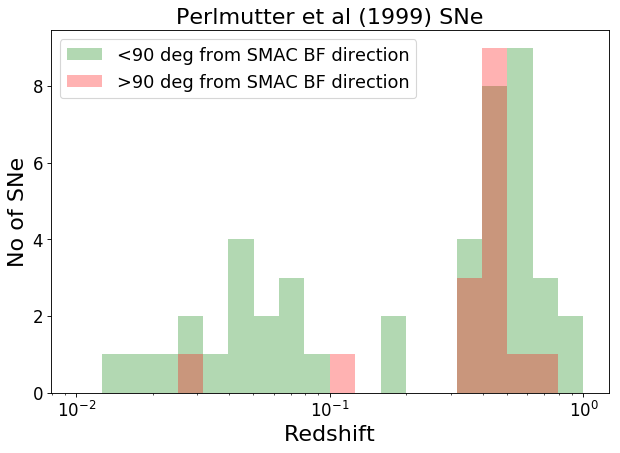

In [22]:
plt.hist(zs[angs<90.], color='green', alpha=0.3, bins=bins, label= '<90 deg from SMAC BF direction')
plt.hist(zs[angs>90.], color='red', alpha=0.3, bins=bins, label= '>90 deg from SMAC BF direction')
plt.legend(loc='best', fontsize=16)
plt.xscale('log')
plt.ylabel('No of SNe', fontsize=20)
plt.xlabel('Redshift', fontsize=20)
plt.title('Perlmutter et al (1999) SNe', fontsize=20)

In [24]:
riessnames = ['1995ao', '1995ap', '1995E', '1996H', '1996I', '1996J', '1996K', '1996R', '1996T', '1996U', '1997ce', '1997cj', '1997ck', '1995K', '1997ap' ]
riessredshifts = [0.24, 0.30, 0.43, 0.62, 0.57, 0.30, 0.38, 0.16, 0.24, 0.43, 0.44, 0.50, 0.97, 0.43, 0.48  ]
riessnames2 = ['1994U', '1997bp', '1996V', '1994C', '1995M', '1995ae', '1994B', '1992bo', '1992bc', '1992aq', '1992ae', '1992P', '1990af', '1994M', '1994S', '1994T', '1995D', '1995E', '1995ac', '1995ak', '1995bd', '1996C', '1996ab', '1992ag', '1992al', '1992bg', '1992bh', '1992bl', '1992bp', '1992br', '1992bs', '1993H', '1993O', '1993ag']
riesscredshifts2 = [3.111, 3.363, 3.870, 4.189, 4.202, 4.308, 4.431, 3.734, 3.779, 4.481, 4.350, 3.896, 4.178, 3.859, 3.685, 4.030, 3.398, 3.547, 4.166, 3.820, 3.679, 3.924, 4.572, 3.891, 3.625, 4.024, 4.130, 4.111, 4.379, 4.418, 4.283, 3.871, 4.189, 4.177]
print(len(riessnames),len(riessredshifts),len(riessnames2),len(riesscredshifts2))

15 15 34 34


In [25]:
zs = np.power(10, np.asarray(riesscredshifts2))/SpeedOfLight

In [26]:
zs

array([0.00430704, 0.00769448, 0.02472745, 0.05154414, 0.05311037,
       0.06779213, 0.0899869 , 0.0180792 , 0.020053  , 0.10096696,
       0.0746757 , 0.02625302, 0.050255  , 0.02410901, 0.01615025,
       0.03574204, 0.00834025, 0.01175383, 0.04888541, 0.02203836,
       0.01592866, 0.02800137, 0.12450285, 0.02595251, 0.01406628,
       0.03525164, 0.04499656, 0.04307044, 0.07983242, 0.08733318,
       0.0639999 , 0.02478445, 0.05154414, 0.05013942])

In [27]:
rnames= riessnames + riessnames2
rredshifts = riessredshifts + [np.power(10, i)/SpeedOfLight for i in riesscredshifts2]

In [28]:
rras = []
rdecs = []
rres={}
for n in rnames:
    #print(n)
    rres[n] = Simbad.query_object('SN'+n)
    print(rres[n])
    rras.append(rres[n]['RA'].data[0])
    rdecs.append(rres[n]['DEC'].data[0])

rras, rdecs = np.asarray(rras), np.asarray(rdecs)

 MAIN_ID       RA         DEC     ... COO_WAVELENGTH     COO_BIBCODE    
            "h:m:s"     "d:m:s"   ...                                   
--------- ----------- ----------- ... -------------- -------------------
SN 1995ao 02 57 30.70 -01 41 19.8 ...                1995IAUC.6267....1K
 MAIN_ID       RA         DEC     ... COO_WAVELENGTH     COO_BIBCODE    
            "h:m:s"     "d:m:s"   ...                                   
--------- ----------- ----------- ... -------------- -------------------
SN 1995ap 03 12 28.13 +00 41 43.4 ...                1995IAUC.6267....1K
MAIN_ID       RA         DEC     ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
           "h:m:s"     "d:m:s"   ...                                            
-------- ----------- ----------- ... -------- -------------- -------------------
SN 1995E 07 51 56.75 +73 00 34.6 ...        D                1995IAUC.6138....1B
MAIN_ID       RA         DEC     ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
           

MAIN_ID       RA         DEC     ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
           "h:m:s"     "d:m:s"   ...                                            
-------- ----------- ----------- ... -------- -------------- -------------------
SN 1994S 12 31 21.85 +29 08 04.0 ...        D                1994IAUC.6016....1B
MAIN_ID       RA         DEC     ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
           "h:m:s"     "d:m:s"   ...                                            
-------- ----------- ----------- ... -------- -------------- -------------------
SN 1994T 13 21 30.73 -02 08 56.5 ...        D                1994IAUC.6007....1P
MAIN_ID       RA          DEC      ... COO_WAVELENGTH     COO_BIBCODE    
           "h:m:s"      "d:m:s"    ...                                   
-------- ------------ ------------ ... -------------- -------------------
SN 1995D 09 40 54.753 +05 08 26.16 ...                1995IAUC.6156....1A
MAIN_ID       RA         DEC     ... COO_QUAL COO_WAVELE

In [29]:
rskc = SkyCoord(ra = rras, dec=rdecs, unit=(u.hourangle, u.deg))
rl, rb = rskc.galactic.l.value, rskc.galactic.b.value


In [30]:
rzs = np.asarray(rredshifts)
print(len(rzs), len(rl), len(rb))

49 49 49


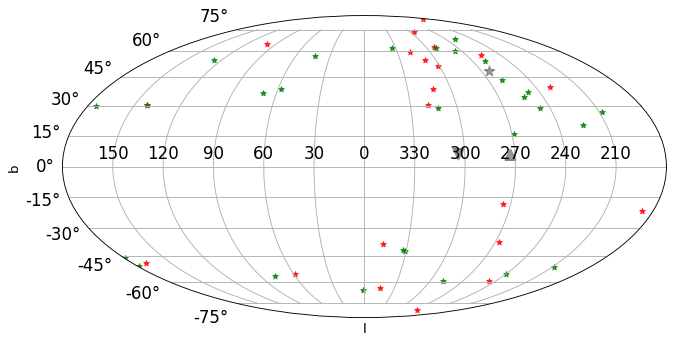

In [31]:
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
org = 0
tick_labels = np.remainder(tick_labels+360+org,360)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')



plot_oneset(ax, rl[rzs<0.05], rb[rzs<0.05],  color='red', marker='*', size=25, fillstyle='none')
plot_oneset(ax, rl[rzs>=0.05], rb[rzs>=0.05],  color='green', marker='*', size=25, fillstyle='none')
plot_oneset(ax, np.asarray([CMBdipl]), np.asarray([CMBdipb]), color='gray', marker='*', size=100, fillstyle='none')
plot_oneset(ax, np.asarray([SMAC2l]), np.asarray([SMAC2b]), color='gray', marker='^', size=100, fillstyle='none')
plot_oneset(ax, np.asarray([TwoMppl]), np.asarray([TwoMppb]), color='gray', marker='v', size=100, fillstyle='none')
ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
#ax.set_title(title)
#ax.title.set_fontsize(15)
ax.set_xlabel("l")
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel("b")
ax.yaxis.label.set_fontsize(12)
ax.grid(True, which='both')
ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
#ax.set_title(title)
#ax.title.set_fontsize(15)
ax.set_xlabel("l")
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel("b")
ax.yaxis.label.set_fontsize(12)
ax.grid(True, which='both')

Text(0.5, 1.0, 'Riess et al (1998) SNe')

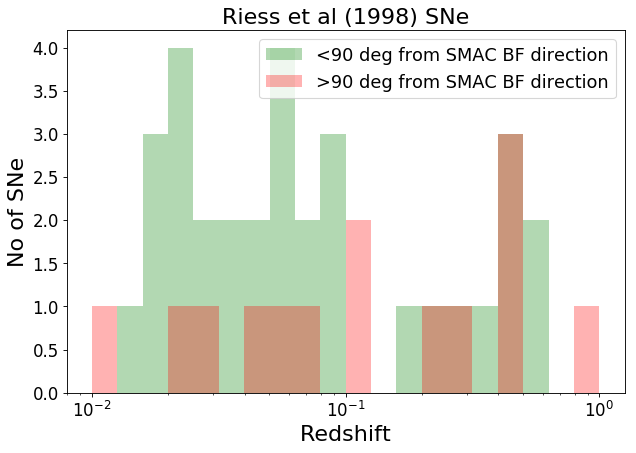

In [32]:
rangs = dAngleDeg(SMAC2l, SMAC2b, rl, rb)
plt.hist(rzs[rangs<90.], color='green', alpha=0.3, bins=bins, label= '<90 deg from SMAC BF direction')
plt.hist(rzs[rangs>90.], color='red', alpha=0.3, bins=bins, label= '>90 deg from SMAC BF direction')
plt.legend(loc='best', fontsize=16)
plt.xscale('log')
plt.ylabel('No of SNe', fontsize=20)
plt.xlabel('Redshift', fontsize=20)
plt.title('Riess et al (1998) SNe', fontsize=20)

In [33]:
len(rzs[rzs<0.1])

32